In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
m1, cov1 = [1, 5], [[1, 0.1], [0.1, 1]]
m2, cov2 = [4, 6], [[1,0.1], [0.1, 0.2]]

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 500)

print(dist1.shape, dist2.shape)

(500, 2) (500, 2)


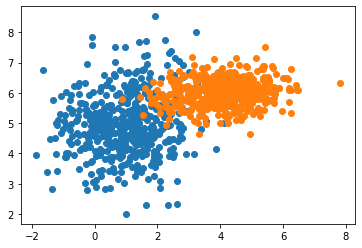

In [38]:
plt.scatter(dist1[:, 0], dist1[:, 1])
plt.scatter(dist2[:, 0], dist2[:, 1])
plt.show()

In [39]:
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1
print(data.shape)

(1000, 3)


In [40]:
np.random.shuffle(data)
data[:10]

array([[ 4.46691801,  6.20178561,  1.        ],
       [-0.05532484,  4.96153564,  0.        ],
       [ 1.2492427 ,  4.06718104,  0.        ],
       [-0.99959082,  4.79594483,  0.        ],
       [ 1.34876009,  5.51920116,  0.        ],
       [ 4.47744662,  6.65988449,  1.        ],
       [ 1.56178902,  4.67210306,  0.        ],
       [ 3.08909344,  6.14334845,  1.        ],
       [ 1.76241933,  4.83799547,  0.        ],
       [ 1.67435057,  4.16204683,  0.        ]])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(data[:,:2], data[:, -1])
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(750, 2) (750,)
(250, 2) (250,)


In [43]:
def sigmoid(z):
    return 1/(1 + np.exp(-1*z))

In [44]:
def hypothesis(X, W, b):
    h = (X*W).sum() + b
    return sigmoid(h)

In [45]:
def log_likelihood(X, W, b, y):
    total = 0.0
    m = X.shape[0]
    for i in range(m):
        if y[i]==0:
            total += np.log(1 - hypothesis(X[i], W, b))
        else:
            total += np.log(hypothesis(X[i], W, b))
    total /= m
    return total

In [46]:
def gradient_ascent(X, W, b, y, learning_rate=0.1):
    m = X.shape[0]
    gradW = np.zeros(2)
    gradb = 0.0
    for i in range(m):
        gradW += (y[i] - hypothesis(X[i], W ,b)) * X[i]
        gradb += (y[i] - hypothesis(X[i], W ,b)) * 1
    gradW /= m
    gradb /= m
    
    W += learning_rate*gradW
    b += learning_rate*gradb
    logs = log_likelihood(X, W, b, y)
    return W, b, logs

In [47]:
W = np.array([0.5, 0.5])
b = 2.2
logs_list =[]
for i in range(500):
    W, b, logs = gradient_ascent(xtrain, W, b, ytrain)
    logs_list.append(logs)
print(W)
print(b)

[ 2.28663891 -1.11280143]
0.6514543843955013


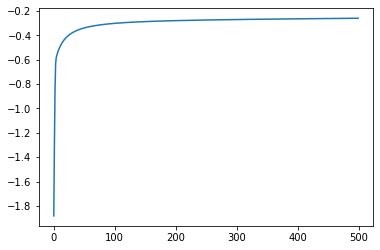

In [48]:
plt.plot(logs_list)
plt.show()

In [49]:
def predict(x_sample, W, b):
    pred = hypothesis(x_sample, W, b)
    if pred < 0.5:
        return 0
    else:
        return 1

In [50]:
def score(Xtest, Ytest, W, b):
    preds = []
    m = Xtest.shape[0]
    for i in range(m):
        p = predict(Xtest[i], W, b)
        preds.append(p)
    preds = np.asarray(preds)
    return (preds==Ytest).sum() * 100 / m

In [51]:
score(xtest, ytest, W, b)

87.6

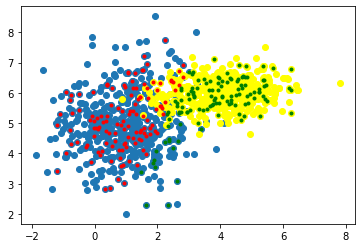

In [58]:
plt.scatter(dist1[:, 0], dist1[:, 1])
plt.scatter(dist2[:, 0], dist2[:, 1], color='yellow')

m = xtest.shape[0]
for i in range(m):
    x = xtest[i]
    p = predict(x, W, b)
    if p == 0:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'g.')
plt.show()